In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [10]:
# Sampling Block Lengths

N = 50000 # Number of samples
Min_Block_Length = 20 # Minimum block length
Max_Block_Length = 150 # Maximum block length
Round_To = 1 # Round to nearest multiple of this number

# Generate random block lengths

## Uniform distribution
Block_Lengths_U = np.random.randint(Min_Block_Length, Max_Block_Length, N)

## Geometric distribution
Block_Lengths_E = np.array([])
hazard_rates = [0.035,0.02,0.01]
for i in range(len(hazard_rates)):
    Block_Lengths_E = np.append(Block_Lengths_E, np.random.geometric(hazard_rates[i], N//len(hazard_rates)))
    # filter out values outside of range
    Block_Lengths_E = Block_Lengths_E[Block_Lengths_E >= Min_Block_Length]
    Block_Lengths_E = Block_Lengths_E[Block_Lengths_E <= Max_Block_Length]

# Round to nearest multiple of Round_To
Block_Lengths_E = np.floor(Block_Lengths_E/Round_To)*Round_To
Block_Lengths_U = np.floor(Block_Lengths_U/Round_To)*Round_To

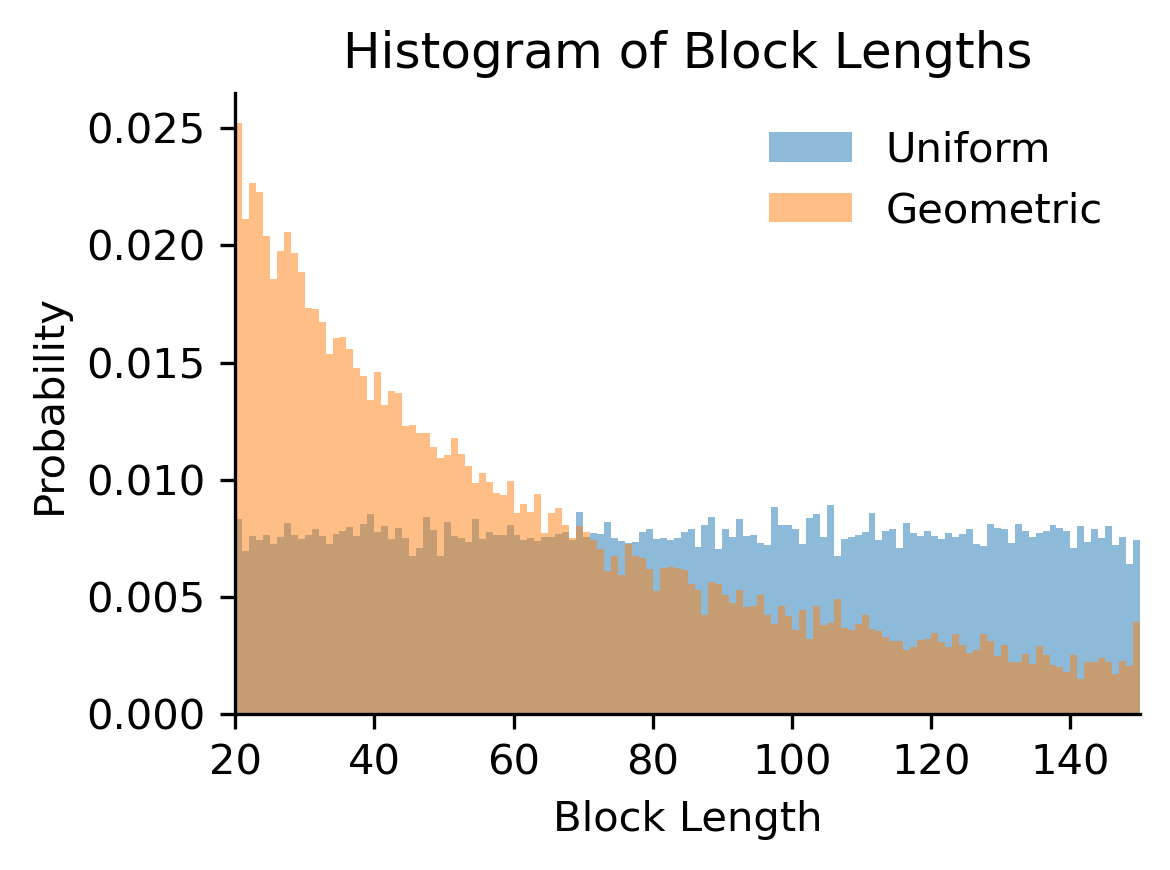

In [11]:
# Plot histogram of block lengths
plt.figure(figsize=(4,3), dpi=300)
plt.hist(Block_Lengths_U, 
         bins=np.arange(Min_Block_Length, Max_Block_Length+Round_To, Round_To), 
         alpha=0.5, label='Uniform', density=True)
plt.hist(Block_Lengths_E, 
         bins=np.arange(Min_Block_Length, Max_Block_Length+Round_To, Round_To), 
         alpha=0.5, label='Geometric', density=True)
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Block Length')
plt.ylabel('Probability')
plt.title('Histogram of Block Lengths')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.xlim([Min_Block_Length, Max_Block_Length])
plt.show()

100%|██████████| 1000/1000 [01:01<00:00, 16.18it/s]


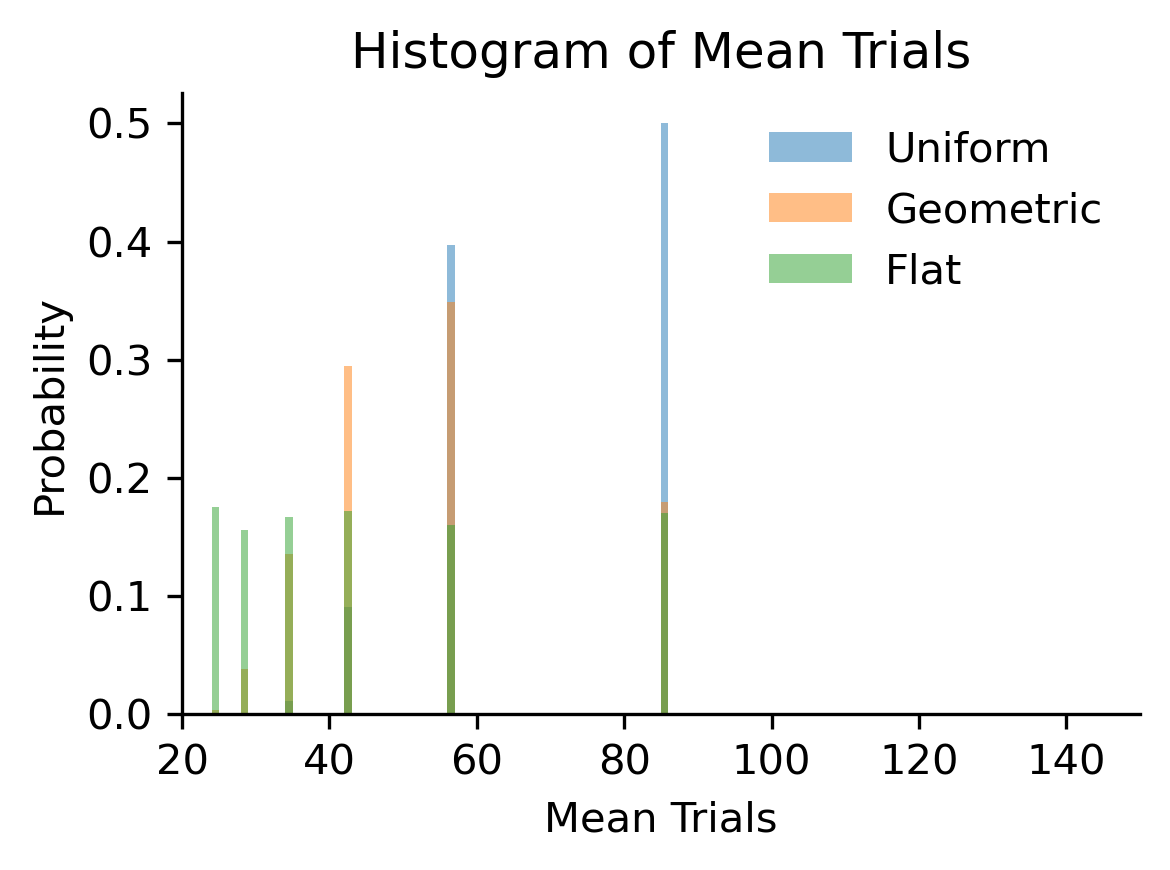

In [12]:
# Number of trials
N_trials = 170
plt.figure(figsize=(4,3), dpi=300)
# generate experiments
for Block_Lengths in [Block_Lengths_U, Block_Lengths_E,]:
    Experiments = []
    current_marker = 0
    for i in range(1,N):
        if np.sum(Block_Lengths[current_marker:i]) >= N_trials:
            exps = Block_Lengths[current_marker:i]
            if sum(exps) > N_trials:
                exps[-1] = N_trials - sum(exps[:-1])
            Experiments.append(exps)
            current_marker = i

    # calculate mean trials of each experiment
    mean_trials = []
    for i in range(len(Experiments)):
        mean_trials.append(np.mean(Experiments[i]))

    # Plot histogram of hazard rates
    plt.hist(mean_trials, density=True, bins=np.arange(20,151,Round_To),
                alpha=0.5, label='Geometric' if Block_Lengths is Block_Lengths_E else 'Uniform')

Experiments = []
for n in tqdm(range(1000)):
    exp = []
    min_mean_block_length = 20
    multinomial_N_max = int(np.floor(N_trials/min_mean_block_length))
    sample_N = np.random.randint(2, multinomial_N_max)
    while True:
            # split N_exp_trials into sample_N blocks
            split_points = np.random.choice(np.arange(1, N_trials), sample_N-1, replace=False)
            split_points = np.sort(split_points)
            split_points = np.concatenate([[0], split_points, [N_trials]])
            block_lengths = np.diff(split_points)
            # check if block lengths are within limits
            if np.all(block_lengths >= Min_Block_Length) and np.all(block_lengths <= Max_Block_Length):
                    break
    # verify that the number of blocks is correct
    assert len(block_lengths) == sample_N, 'Incorrect number of blocks'
    # add blocks to protocol
    for block_length in block_lengths:
            exp.append(block_length)
    Experiments.append(exp)

# calculate mean trials of each experiment
mean_trials = []
for i in range(len(Experiments)):
    mean_trials.append(np.mean(Experiments[i]))

# Plot histogram of hazard rates
plt.hist(mean_trials, density=True, bins=np.arange(20,151,Round_To),
            alpha=0.5, label='Flat')

plt.legend(loc='upper right', frameon=False)
plt.xlabel('Mean Trials')
plt.ylabel('Probability')
plt.title('Histogram of Mean Trials')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.xlim([20, 150])
plt.show()


100%|██████████| 1000/1000 [00:59<00:00, 16.74it/s]


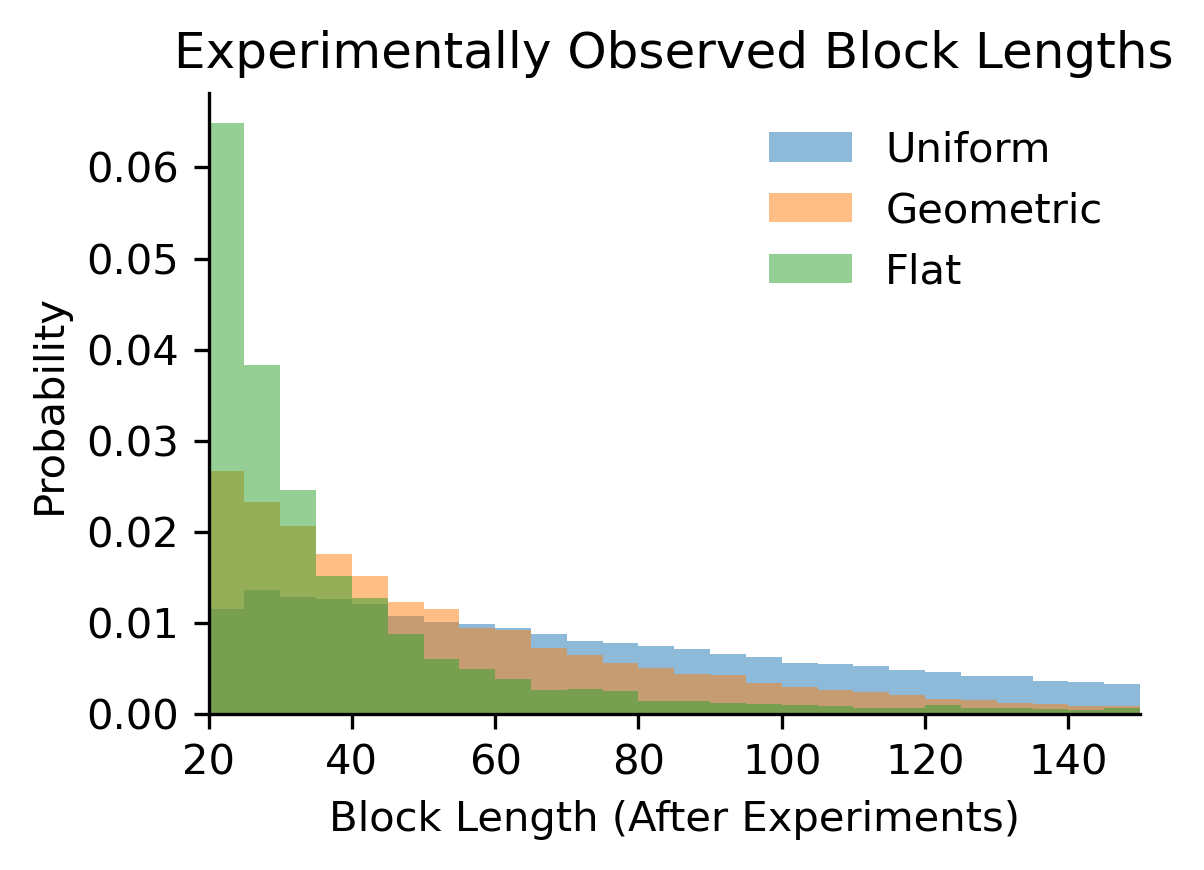

In [9]:
# Number of trials
N_trials = 170
plt.figure(figsize=(4,3), dpi=300)
# generate experiments
for Block_Lengths in [Block_Lengths_U, Block_Lengths_E]:
    Experiments = []
    current_marker = 0
    for i in range(1,N):
        if np.sum(Block_Lengths[current_marker:i]) >= N_trials:
            exps = Block_Lengths[current_marker:i]
            if sum(exps) > N_trials:
                exps[-1] = N_trials - sum(exps[:-1])
            Experiments.append(exps)
            current_marker = i

    # Plot histogram of block lengths
    plt.hist(np.concatenate(Experiments),
         bins=np.arange(Min_Block_Length, Max_Block_Length+Round_To, Round_To), 
         alpha=0.5, label='Uniform' if Block_Lengths is Block_Lengths_U else 'Geometric', density=True)
    
Experiments = []
for n in tqdm(range(1000)):
    exp = []
    min_mean_block_length = 20
    multinomial_N_max = int(np.floor(N_trials/min_mean_block_length))
    sample_N = np.random.randint(2, multinomial_N_max)
    while True:
            # split N_exp_trials into sample_N blocks
            split_points = np.random.choice(np.arange(1, N_trials), sample_N-1, replace=False)
            split_points = np.sort(split_points)
            split_points = np.concatenate([[0], split_points, [N_trials]])
            block_lengths = np.diff(split_points)
            # check if block lengths are within limits
            if np.all(block_lengths >= Min_Block_Length) and np.all(block_lengths <= Max_Block_Length):
                    break
    # verify that the number of blocks is correct
    assert len(block_lengths) == sample_N, 'Incorrect number of blocks'
    # add blocks to protocol
    for block_length in block_lengths:
            exp.append(block_length)
    Experiments.append(exp)

# Plot histogram of hazard rates
plt.hist(np.concatenate(Experiments),
            bins=np.arange(Min_Block_Length, Max_Block_Length+Round_To, Round_To),
            alpha=0.5, label='Flat', density=True)

plt.legend(loc='upper right', frameon=False)
plt.xlabel('Block Length (After Experiments)')
plt.ylabel('Probability')
plt.title('Experimentally Observed Block Lengths')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.xlim([20, 150])
plt.show()


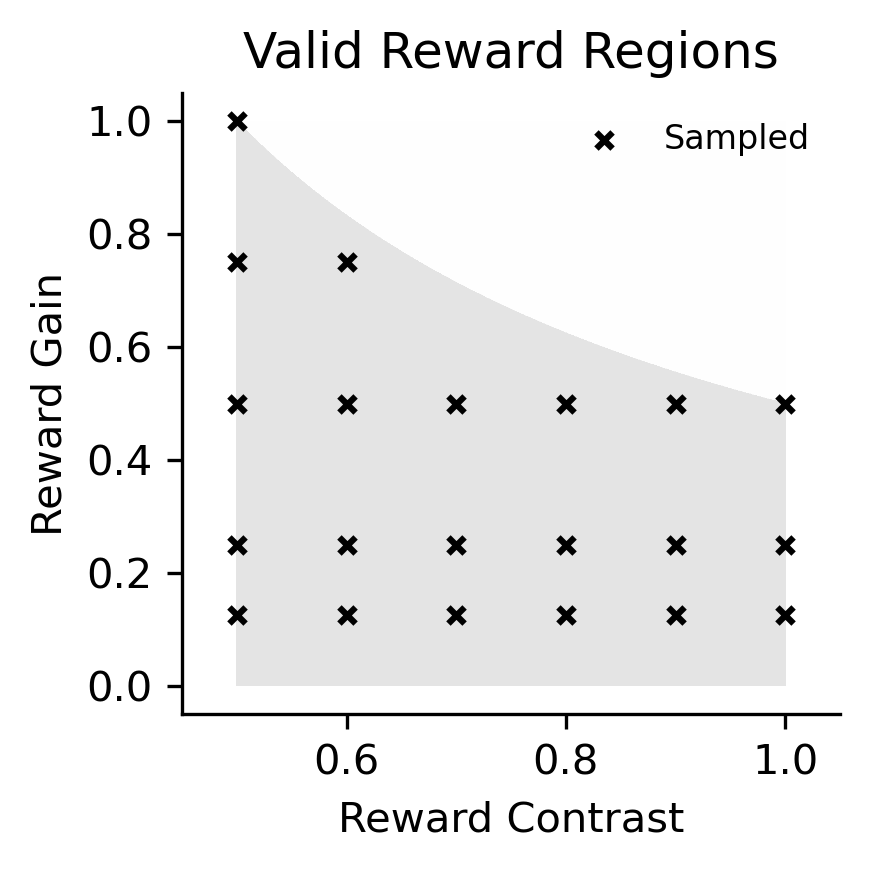

In [187]:
reward_contrasts = np.linspace(0.5, 1, 1000)
reward_gains = np.linspace(0, 1, 1000)

sampled_gains = [0.125,0.25,0.5,0.75,1.0]
sampled_contrasts = [0.5,0.6,0.7,0.8,0.9,1.0]
# create grid
X, Y = np.meshgrid(reward_contrasts, reward_gains)
sampled_X, sampled_Y = np.meshgrid(sampled_contrasts, sampled_gains)

# calculate reward probabilities
Z = 2* X * Y
Z_ = 2 * Y * (1-X)
sampled_Z = 2* sampled_X * sampled_Y
sampled_Z_ = 2 * sampled_Y * (1-sampled_X)

# check where reward probabilities are valid
Z_valid = np.logical_and(Z >= 0, Z <= 1)
Z__valid = np.logical_and(Z_ >= 0, Z_ <= 1)
sampled_Z_valid = np.logical_and(sampled_Z >= 0, sampled_Z <= 1)
sampled_Z__valid = np.logical_and(sampled_Z_ >= 0, sampled_Z_ <= 1)

# check where both reward probabilities are valid
Z_both_valid = np.logical_and(Z_valid, Z__valid)
sampled_Z_both_valid = np.logical_and(sampled_Z_valid, sampled_Z__valid)

# get valid sampled reward contrasts and gains
valid_sampled_contrasts = sampled_X[sampled_Z_both_valid]
valid_sampled_gains = sampled_Y[sampled_Z_both_valid]

# plot the valid reward regions
plt.figure(figsize=(3,3), dpi=300)
plt.contourf(X, Y, Z_both_valid, cmap='Greys', vmin=0, vmax=5)
# plot the sampled reward contrasts and gains
plt.scatter(valid_sampled_contrasts, valid_sampled_gains, c='k', s=15, marker='x', label='Sampled')
plt.xlabel('Reward Contrast')
plt.ylabel('Reward Gain')
plt.title('Valid Reward Regions')
plt.legend(loc='upper right', frameon=False, fontsize=8)
plt.xlim([0.45, 1.05])
plt.ylim([-0.05, 1.05])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [188]:
# protocol generation code
import numpy as np

def generate_protocol(
        N_naive_trials=10,
        N_exp_trials=190,
        block_distribution='geometric',
        block_limits=[20, 150],
        hazard_rates=[0.035,0.02,0.01],
        max_hazard_rate=None,
        reward_contrasts=[0.5,0.6,0.7,0.8,0.9,1.0],
        reward_gains=[0.125,0.25,0.5,0.75,1.0],
        alternating=True,
        expectation_sampling=False,
        seed=None
):
        """
        Generate a protocol for a 2AFC task with a variable number of trials per block.

        Parameters
        ----------
        N_naive_trials : int
                Number of naive trials to include in the beginning of the protocol.
        N_exp_trials : int
                Number of experimental trials to include in the protocol.
        block_distribution : str
                Distribution to use for block lengths. Must be one of 'geometric', 'uniform', or 'flat'.
        block_limits : list
                Limits for block lengths. Must be in the form [min, max].
        hazard_rates : list
                Hazard rates to sample from for geometric block distribution. Must be in the form [hazard_rate_1, hazard_rate_2, ...].
        max_hazard_rate : float
                Maximum hazard rate to sample from for flat block distribution. Must be a float between 0 and 1/min(block_limits).
        reward_contrasts : list
                Reward contrasts to sample from. Must be in the form [contrast_1, contrast_2, ...].
        reward_gains : list
                Reward gains to sample from. Must be in the form [gain_1, gain_2, ...].
        alternating : bool
                Whether to alternate the higher reward between two blocks.
        expectation_sampling : bool
                Whether to use the expectation of the reward distribution to ensure exactly the expected number of trials are rewarded in each block.
        seed : int
                Seed for random number generator.
        """

        # Validate inputs
        
        assert block_distribution in ['geometric', 'uniform', 'flat'], 'block_distribution must be one of "geometric", "uniform", or "flat"'
        assert len(block_limits) == 2, 'block_limits must be a list of length 2'
        assert block_limits[0] < block_limits[1], 'block_limits must be in the form [min, max]'

        if block_distribution == 'geometric':
                assert hazard_rates is not None, 'hazard_rates must be specified for geometric block distribution'
                assert np.all(np.array(hazard_rates) >= 0), 'hazard_rates must be greater than or equal to 0'
                assert np.all(np.array(hazard_rates) <= 1), 'hazard_rates must be less than or equal to 1'
        else:
                hazard_rates = None

        if block_distribution == 'flat':
                assert max_hazard_rate is not None, 'max_hazard_rate must be specified for flat block distribution'
                assert max_hazard_rate >= 0, 'max_hazard_rate must be greater than or equal to 0'
                assert max_hazard_rate <= 1/np.min(block_limits), 'max_hazard_rate must be less than or equal to 1/min(block_limits)'
        else:
                max_hazard_rate = None
                
        assert np.all(np.array(reward_contrasts) >= 0.5), 'reward_contrasts must be greater than or equal to 0.5'
        assert np.all(np.array(reward_contrasts) <= 1), 'reward_contrasts must be less than or equal to 1'
        assert np.all(np.array(reward_gains) > 0), 'reward_gains must be greater than 0'
        assert np.all(np.array(reward_gains) <= 1), 'reward_gains must be less than or equal to 1'

        # set seed
        if seed is not None:
                np.random.seed(seed)
        else:
                np.random.seed()
        
        # generate block lengths
        exp = []
        if block_distribution == 'flat':
                min_mean_block_length = 1/max_hazard_rate
                multinomial_N_max = int(np.floor(N_exp_trials/min_mean_block_length))
                sample_N = np.random.randint(2, multinomial_N_max)
                while True:
                        # split N_exp_trials into sample_N blocks
                        split_points = np.random.choice(np.arange(1, N_exp_trials), sample_N-1, replace=False)
                        split_points = np.sort(split_points)
                        split_points = np.concatenate([[0], split_points, [N_exp_trials]])
                        block_lengths = np.diff(split_points)
                        # check if block lengths are within limits
                        if np.all(block_lengths >= block_limits[0]) and np.all(block_lengths <= block_limits[1]):
                                break
                # verify that the number of blocks is correct
                assert len(block_lengths) == sample_N, 'Incorrect number of blocks'
                # add blocks to protocol
                for block_length in block_lengths:
                        exp.append(block_length)
        else:
                if block_distribution == 'geometric':
                        hazard_rate = np.random.choice(hazard_rates)

                while True:
                        # generate block lengths
                        if block_distribution == 'geometric':
                                block_length = np.random.geometric(hazard_rate)
                        elif block_distribution == 'uniform':
                                block_length = np.random.randint(block_limits[0], block_limits[1]+1)
                        # check if block length is within limits
                        if block_length >= block_limits[0] and block_length <= block_limits[1]:
                                exp.append(block_length)
                        # check if total number of trials is correct
                        if np.sum(exp) >= N_exp_trials:
                                if np.sum(exp) > N_exp_trials:
                                        exp[-1] = exp[-1] - (np.sum(exp) - N_exp_trials)
                                break
        assert np.sum(exp) == N_exp_trials, 'Incorrect number of experimental trials'
        # print('Experimental block lengths: {}'.format(exp))

        # generate probabilities
        o1 = np.zeros(N_naive_trials+N_exp_trials)
        o2 = np.zeros(N_naive_trials+N_exp_trials)

        i = N_naive_trials
        max_state = 0
        for block_length in exp:
                # generate reward probabilities
                while True:
                        sampled_reward_gain = np.random.choice(reward_gains)
                        sampled_reward_contrast = np.random.choice(reward_contrasts)

                        p1 = 2 * sampled_reward_gain * sampled_reward_contrast
                        p2 = 2 * sampled_reward_gain * (1 - sampled_reward_contrast)

                        if (p1 >= 0) and (p1 <= 1) and (p2 >= 0) and (p2 <= 1):
                                break
                
                # generate blocks
                if alternating:
                        if max_state == 0:
                                o1[i:i+block_length] = p1
                                o2[i:i+block_length] = p2
                                max_state = 1
                        else:
                                o1[i:i+block_length] = p2
                                o2[i:i+block_length] = p1
                                max_state = 0
                else:
                        if np.random.rand() < 0.5:
                                o1[i:i+block_length] = p1
                                o2[i:i+block_length] = p2
                        else:
                                o1[i:i+block_length] = p2
                                o2[i:i+block_length] = p1

                if expectation_sampling:
                        ep1 = np.floor(p1*block_length)
                        ep2 = np.floor(p2*block_length)
                        ep1_ = [1]*int(ep1) + [0]*int(block_length-ep1)
                        ep2_ = [1]*int(ep2) + [0]*int(block_length-ep2)
                        np.random.shuffle(ep1_)
                        np.random.shuffle(ep2_)

                        if alternating:
                                if max_state == 0:
                                        o1[i:i+block_length] = ep1_
                                        o2[i:i+block_length] = ep2_
                                        max_state = 1
                                else:
                                        o1[i:i+block_length] = ep2_
                                        o2[i:i+block_length] = ep1_
                                        max_state = 0
                        else:
                                if np.random.rand() < 0.5:
                                        o1[i:i+block_length] = ep1_
                                        o2[i:i+block_length] = ep2_
                                else:
                                        o1[i:i+block_length] = ep2_
                                        o2[i:i+block_length] = ep1_
                i += block_length
        
        return o1, o2

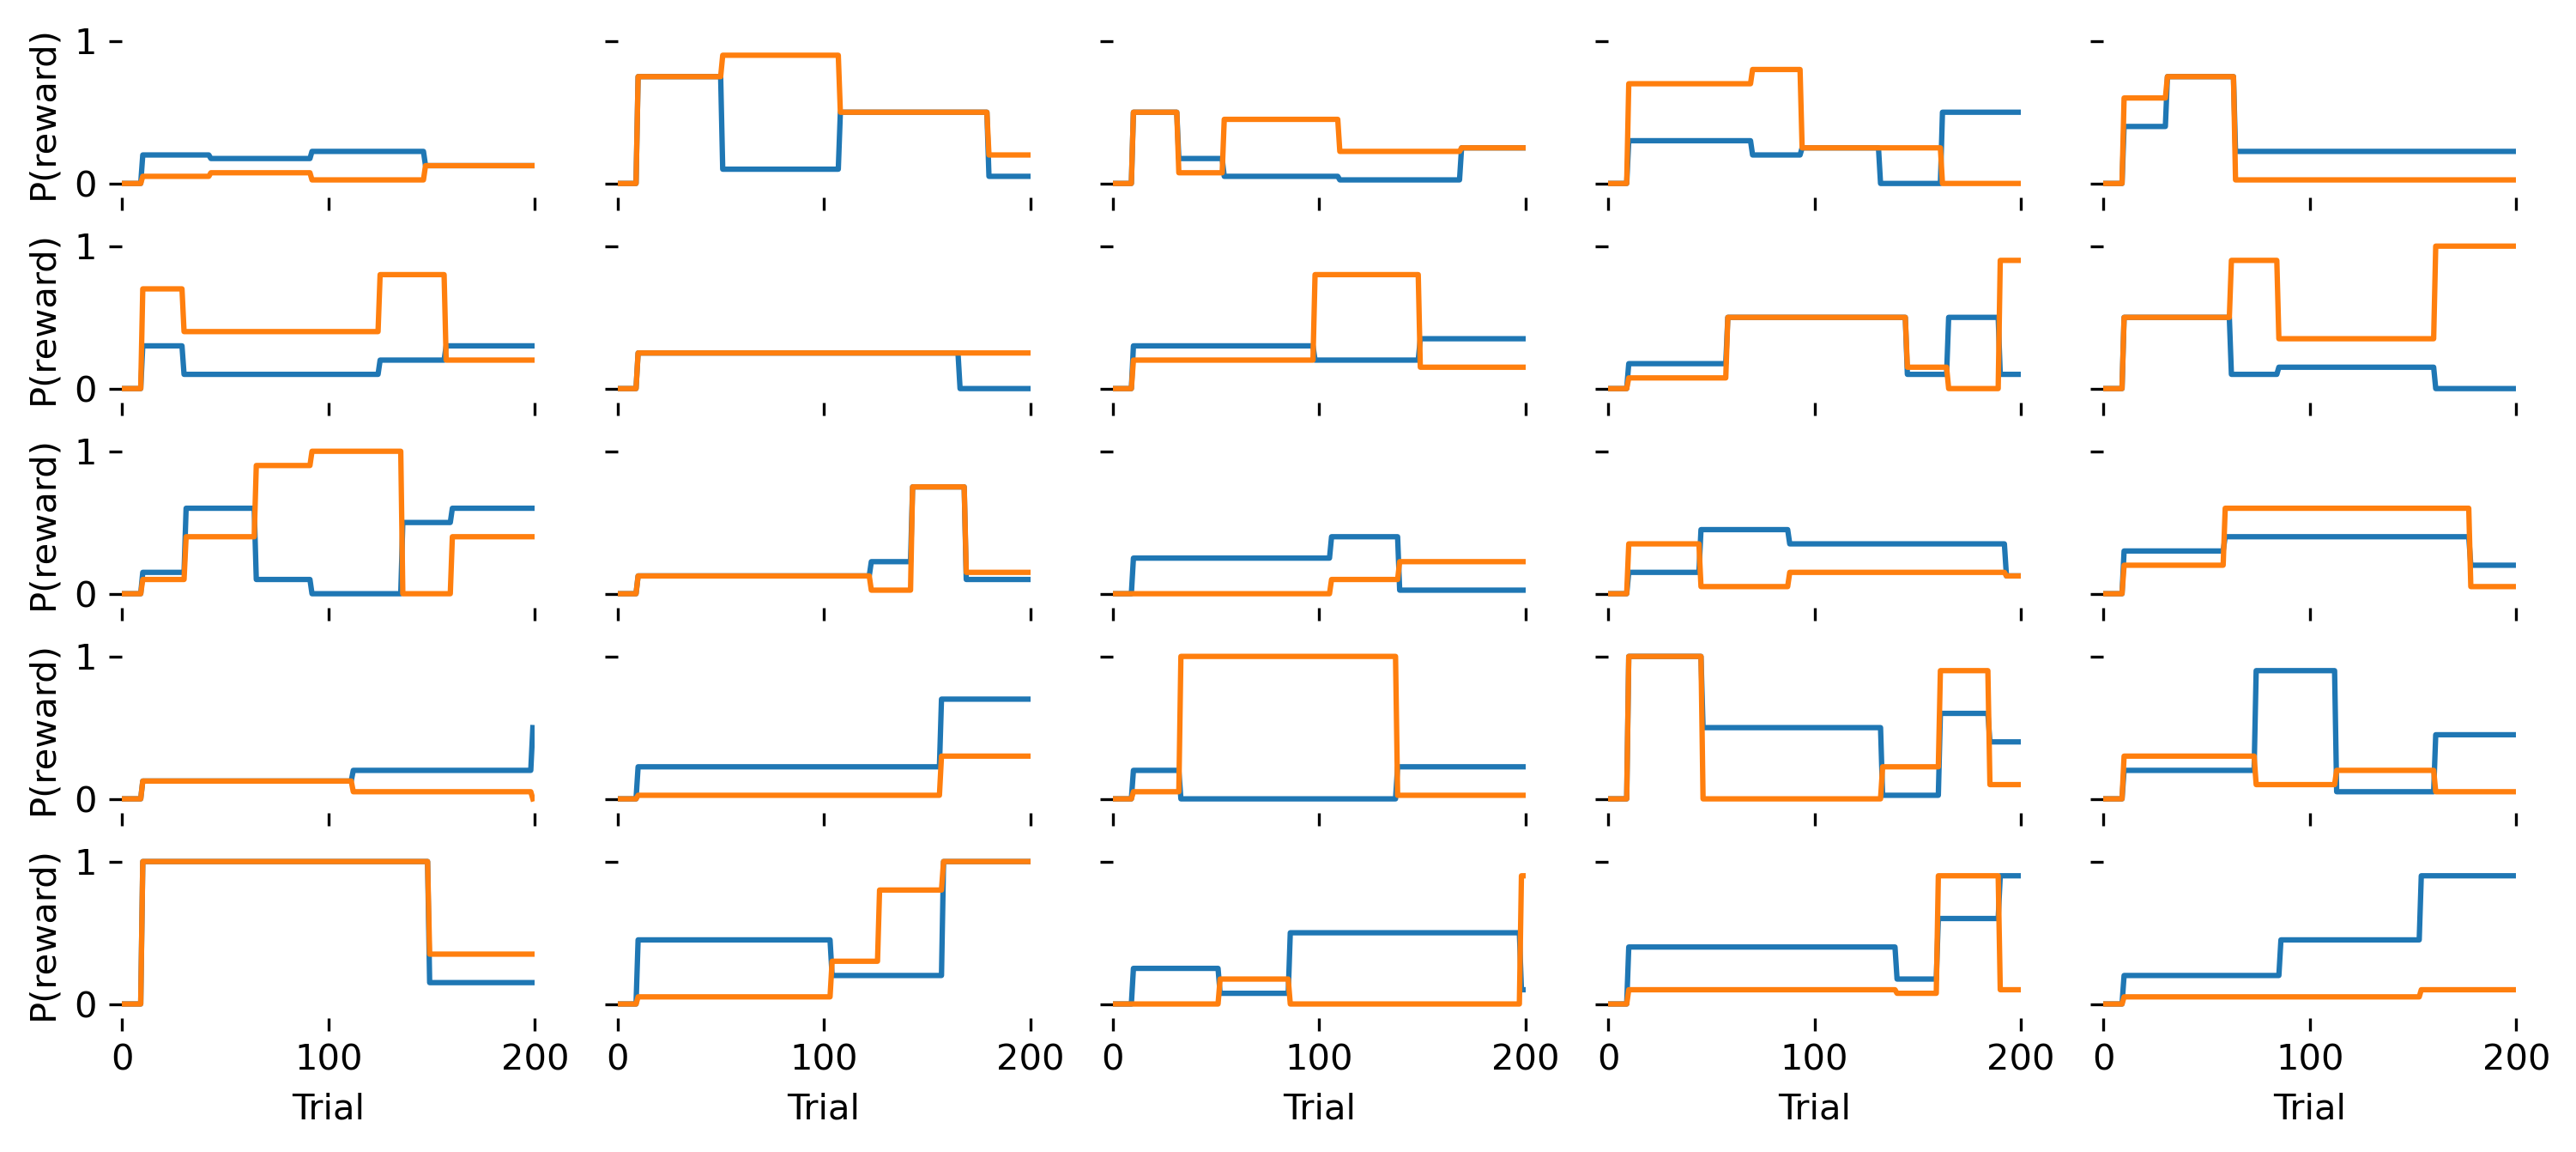

In [204]:
fig,ax = plt.subplots(5,5,figsize=(12,5),sharex=True,sharey=True, dpi=300)
for i in range(25):
        o1,o2 = generate_protocol(alternating=False, expectation_sampling=False)
        ax[i//5,i%5].plot(np.arange(len(o1)), o1, '-')
        ax[i//5,i%5].plot(np.arange(len(o2)), o2, '-')
        if i//5 == 4:
            ax[i//5,i%5].set_xlabel('Trial')
        if i%5 == 0:
            ax[i//5,i%5].set_ylabel('P(reward)')
        ax[i//5,i%5].set_xlim(0,len(o1))
        ax[i//5,i%5].set_ylim(-0.1,1.1)
        # remove spines
        ax[i//5,i%5].spines['top'].set_visible(False)
        ax[i//5,i%5].spines['right'].set_visible(False)
        ax[i//5,i%5].spines['bottom'].set_visible(False)
        ax[i//5,i%5].spines['left'].set_visible(False)
plt.show()

In [199]:
# protocol generation code
import numpy as np

def generate_protocol(
        N_naive_trials=10,
        N_exp_trials=190,
        block_distribution='geometric',
        block_limits=[20, 150],
        hazard_rates=[0.035,0.02,0.01],
        reward_contrasts=[0.5,0.6,0.7,0.8,0.9,1.0],
        reward_gains=[0.125,0.25,0.5,0.75,1.0],
        alternating=True,
        expectation_sampling=False,
        seed=None
):
        # set seed
        np.random.seed(seed)
        
        # generate block lengths
        exp = []
        hazard_rate = np.random.choice(hazard_rates) if block_distribution == 'geometric' else None

        while True:
            # generate block lengths
            block_length = np.random.geometric(hazard_rate) if block_distribution == 'geometric' else np.random.randint(block_limits[0], block_limits[1]+1)
            # check if block length is within limits
            if block_length >= block_limits[0] and block_length <= block_limits[1]:
                exp.append(block_length)
            # check if total number of trials is correct
            if np.sum(exp) >= N_exp_trials:
                exp[-1] = exp[-1] - (np.sum(exp) - N_exp_trials)
                break

        # generate probabilities
        o1, o2 = np.zeros(N_naive_trials + N_exp_trials), np.zeros(N_naive_trials + N_exp_trials)
        i = N_naive_trials
        max_state = 0

        for block_length in exp:
            # generate reward probabilities
            while True:
                sampled_reward_gain, sampled_reward_contrast = np.random.choice(reward_gains), np.random.choice(reward_contrasts)
                p1, p2 = 2 * sampled_reward_gain * sampled_reward_contrast, 2 * sampled_reward_gain * (1 - sampled_reward_contrast)
                if (p1 >= 0) and (p1 <= 1) and (p2 >= 0) and (p2 <= 1):
                    break
            if expectation_sampling:
                ep1, ep2 = int(p1*block_length), int(p2*block_length)
                ep1_, ep2_ = [1]*ep1 + [0]*(block_length-ep1), [1]*ep2 + [0]*(block_length-ep2)
                np.random.shuffle(ep1_)
                np.random.shuffle(ep2_)
                condition = (max_state == 0) if alternating else (np.random.rand() < 0.5)
                o1[i:i+block_length], o2[i:i+block_length] = ep1_ if condition else ep2_, ep2_ if condition else ep1_
                max_state = 1 - max_state
            else:
                condition = (max_state ==0) if alternating else (np.random.rand() < 0.5)
                o1[i:i+block_length], o2[i:i+block_length] = p1 if condition else p2, p2 if condition else p1
                max_state = 1 - max_state
            i += block_length
        return o1, o2

In [202]:
generate_protocol()

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
        0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
        0.75, 0.75, 0.75, 0.75, 0.75, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
        0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
        0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 